<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="gray">
سوال 1    
</font>
</h1>

<div dir='rtl'>
    <font face="vazir" dir=rtl size=3>
         ابتدا در سلول زیر کتابخانه های مورد نظر را اضافه می کنیم.
    </font>
</div>

In [1]:
import numpy as np
import control
import matplotlib.pyplot as plt
from scipy.signal import *
from scipy.fft import *
%matplotlib inline
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

<script type="text/x-mathjax-config">
  MathJax.Hub.Config({tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}});
</script>
<script type="text/javascript"
  src="http://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.1/MathJax.js?config=TeX-AMS-MML_HTMLorMML">
</script>
<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3 style:"direction: rtl; text-align: right;">
        الف) در این بخش با تعریف یک آرایه numpy مقادیر پاسخ ضربه ($h[n]$) را ذخیره می کنیم و سپس آنها را با استفاده از کتابخانه matplotlib
        نمایش می دهیم. برای اینکار از معادله زیر استفاده می کنیم:
        <p style="text-align: center">
        $\tag{1} h[n]-0.5h[n-1]+0.25h[n-2]=\delta[n]+2\delta[n-1]+\delta[n-3]$
        </p>
    </font>
</p>

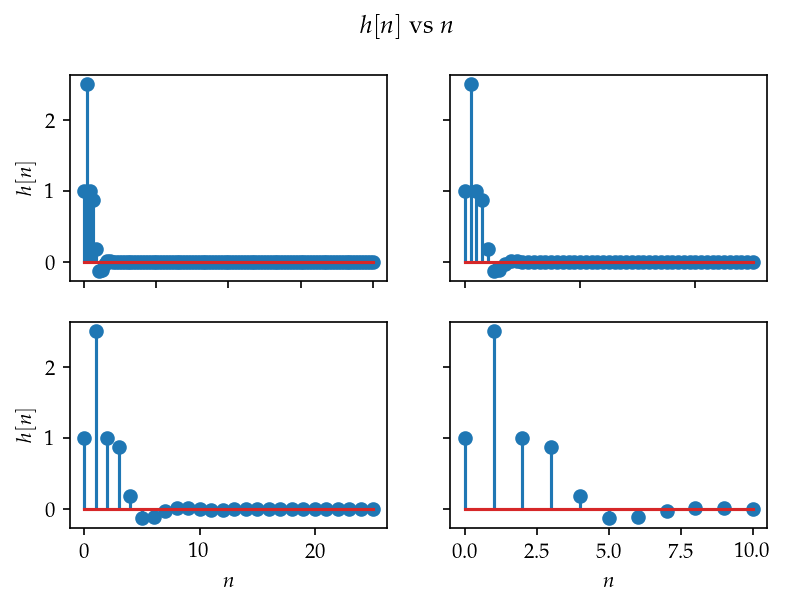

In [2]:
h = np.zeros((101, 1)) #define h[n]

#calculate values of h[0] and h[1]
h[0] = 1
h[1] = 2.5

#calculate other values of impulse response
for i in range(2, h.shape[0]):
    if i != 3:
        h[i] = 0.5*h[i-1] - 0.25*h[i-2]
    else:
        h[i] = 0.5*h[i-1] - 0.25*h[i-2] + 1

#draw impulse response as a function of (n)
fig, axs = plt.subplots(2, 2, dpi=150)
plt.suptitle("$h[n]$ vs $n$")

axs[0, 0].stem(h)
axs[0, 1].stem(h[:51,:])
axs[1, 0].stem(h[:26,:])
axs[1, 1].stem(h[:11,:])

for ax in axs.flat:
    ax.set(xlabel='$n$', ylabel='$h[n]$')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
plt.savefig('Q1_part1')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         ب) با گرفتن تبدیل z از معادله‌ی 1 خواهیم داشت:
        <p style="text-align: center">
            $\tag{2}H(z)=\dfrac{1+2z^{-1}+z^{-3}}{1-0.5z^{-1}+0.25z^{-2}}$
        </p>
        <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
        حال در سلول زیر با استفاده از دستورات موجود در کتابخانه scipy.signal پاسخ ضربه را رسم می‌کنیم.
        </p>
    </font>
</p>

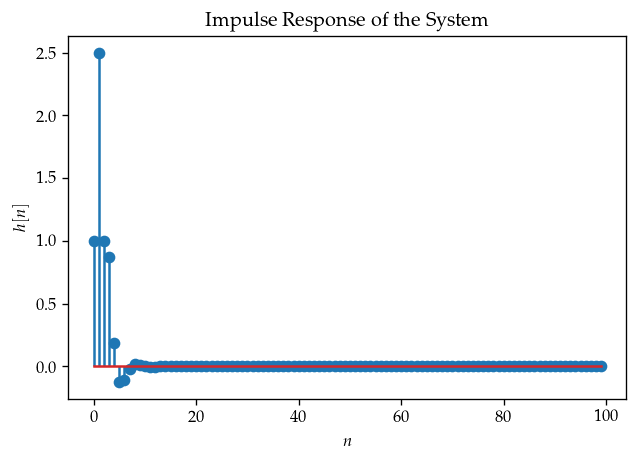

In [104]:
#define system with its transfer function
system = TransferFunction([1, 2, 0, 1], [1, -0.5, 0.25, 0], dt=1)
#find impulse response of the system
t, y = dimpulse(system, n=100)
#plot the impulse response
plt.figure(dpi=120)
plt.stem(t, np.squeeze(y))
plt.title("Impulse Response of the System")
plt.xlabel("$n$")
plt.ylabel("$h[n]$")
plt.savefig('Q1_part2')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         پ) برای انجام این بخش کافیست تبدیل z سیگنال x[n] را در تبدیل z پاسخ ضربه سیستم ضرب کنیم و از این تبدیل z بدست آمده تبدیل معکوس بگیریم که اینکار در سلول زیر انجام شده است.
    </font>
</p>

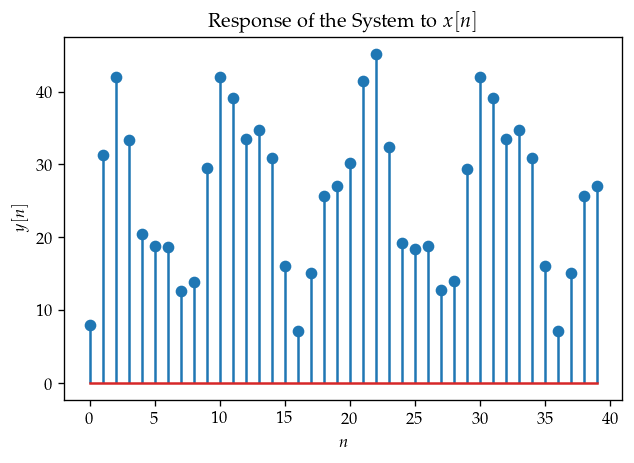

In [105]:
X1 = 5 * control.TransferFunction([1, 0], [1, -1], dt=1)
X2 = 3 * control.TransferFunction([1, -np.cos(0.2*np.pi), 0], [1, -2*np.cos(0.2*np.pi), 1], dt=1)
X3 = 4 * control.TransferFunction([np.sin(0.6*np.pi), 0], [1, -2*np.cos(0.5*np.pi), 1], dt=1)
X = X1 + X2 + X3
H = control.TransferFunction([1, 2, 0, 1], [1, -0.5, 0.25, 0], dt=1)
Y = X * H
# find the inverse z transform of Y
n, y = control.impulse_response(Y)
#plot y[n]
plt.figure(dpi=120)
plt.stem(n[:40], np.squeeze(y)[:40])
plt.title("Response of the System to $x[n]$")
plt.xlabel("$n$")
plt.ylabel("$y[n]$")
plt.savefig('Q1_part3')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         ت) برای رسم پاسخ فرکانسی کافیست از دستور freqz در کتابخانه scipy.signal استفاده کنیم. نتیجه به شکل زیر خواهد شد:
    </font>
</p>

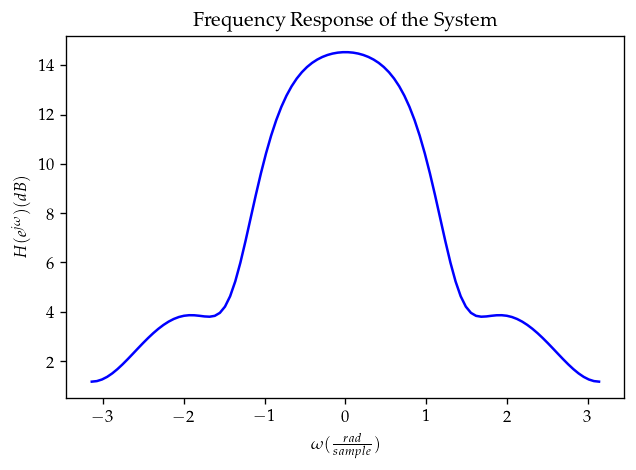

In [106]:
#find the frequency response of the system
w, h = freqz([1, 2, 0, 1], [1, -0.5, 0.25], worN=np.linspace(-np.pi, np.pi, 100))
#draw the frequency response
plt.figure(dpi=120)
plt.plot(w, 20*np.log10(abs(h)), 'b')
plt.title("Frequency Response of the System")
plt.ylabel("$H(e^{j\omega})(dB)$")
plt.xlabel("$\omega (\\frac{rad}{sample})$")
plt.savefig('Q1_part4')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
        ث) برای رسم فاز پاسخ فرکانسی نیز از دستور freqz استفاده می کنیم. همانطور که در شکل ها مشخص است در این سیستم خاص نمودار ها در هر دو حالت wrapped و unwrapped یکی می‌باشند.
    </font>
</p>

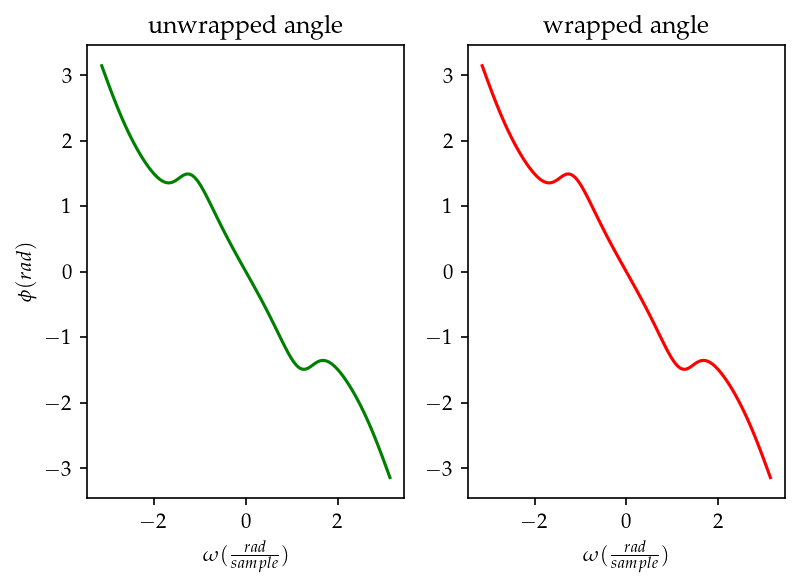

In [107]:
fig, axs = plt.subplots(1, 2, dpi=150)
angles = np.unwrap(np.angle(h))
axs[0].plot(w, angles, 'g')
axs[0].set_title("unwrapped angle")
axs[0].set_xlabel("$\omega (\\frac{rad}{sample})$")
axs[0].set_ylabel("$\phi (rad)$")
axs[1].plot(w, np.angle(h), 'r')
axs[1].set_title("wrapped angle")
axs[1].set_xlabel("$\omega (\\frac{rad}{sample})$")
plt.savefig('Q1_part5')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
        ج) برای محاسبه صفر و قطب ها از دستورات  pzmap موجود در کتابخانه control استفاده می‌کنیم.
        همانطور که مشخص است صفر ها نقاط 
        $(-2.21, 0.10+0.67j, 0.10-0.67j)$
        و قطب ها نقاط
        $(0.25+0.43j, 0.25-0.43j, 0)$
        می‌باشند.
    </font>
</p>

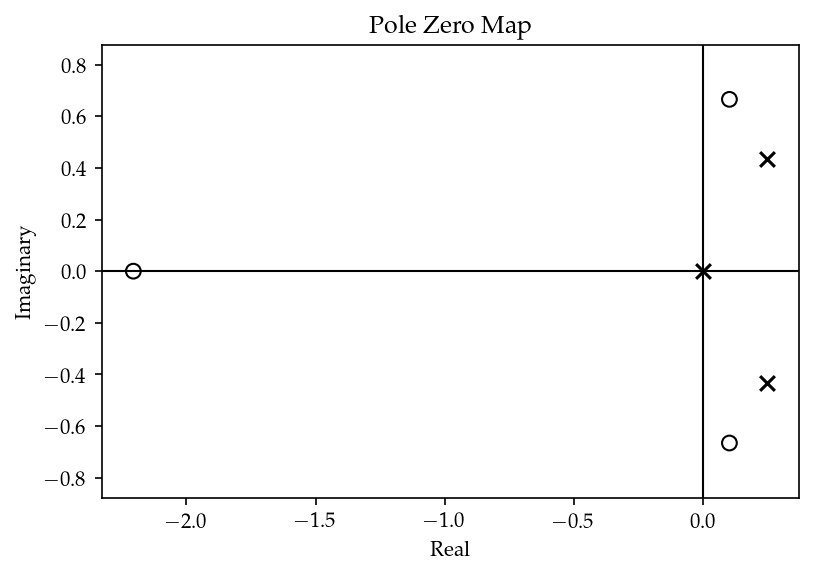

In [110]:
plt.figure(dpi=150)
control.pzmap(control.TransferFunction([1, 2, 0, 1], [1, -0.5, 0.25, 0]), plot=True)
plt.savefig('Q1_part6')

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="gray">
سوال 2    
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         برای حل این بخش همانطور که در صورت سوال گفته شده است ابتدا با استفاده از تابع residuez کتابخانه scipy.signal تابع شبکه را به کسر های جزیی تفکیک می‌کنیم.
    </font>
</p>

In [31]:
r, p, k = residuez([1, 0, -1], [1, 0.9, 0.6, 0.05])
print(r)
print(p)
print(k)

[-2.17599961+0.j          1.58799981-0.14092967j  1.58799981+0.14092967j]
[-0.09558177+0.j         -0.40220911+0.60111572j -0.40220911-0.60111572j]
[]


<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         با توجه به جواب های سلول بالا می‌توان گفت تجزیه تابع شبکه به کسر های جزیی به شکل زیر است:
        <p style="text-align: center">
            $\tag{3}H(z)=\dfrac{-2.176}{1+0.096z^{-1}}+\dfrac{1.588-0.141j}{1-(-0.402+0.601j)z^{-1}}+\dfrac{1.588+0.141j}{1-(-0.402-0.601j)z^{-1}}$
        </p>
        <p style="text-align: center;line-height:200%;font-family:vazir;font-size:medium">
            $\tag{4}h[n]=-2.176(-0.096)^n u[n]-2(0.723)^n \cos(0.981n) u[n]$
        </p>
        <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
        در سلول زیر پاسخ ضربه رسم شده است و قابل مشاهده می‌باشد.
        </p>
    </font>
</p>

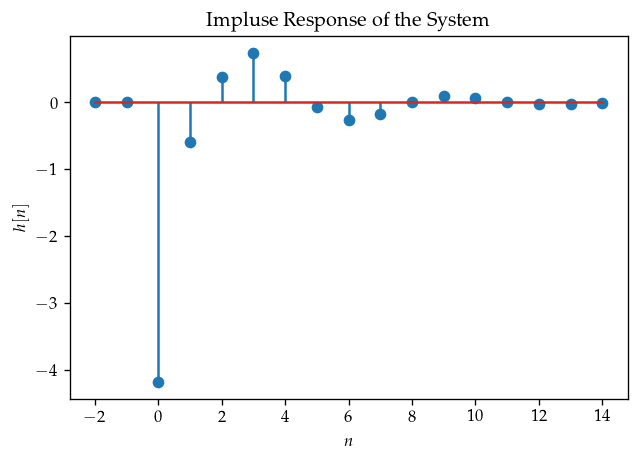

In [111]:
def h(n):
    y = -2.176*(-0.096)**n - 2*(0.723)**n*np.cos(0.981*n)
    n_0 = np.where(n==0)[0][0]
    y[:n_0] = 0
    return y
    
n = np.arange(-2, 15, 1)
plt.figure(dpi=120)
plt.stem(n, h(n))
plt.title("Impluse Response of the System")
plt.xlabel("$n$")
plt.ylabel("$h[n]$")
plt.savefig('Q2')

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="gray">
سوال 3    
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
        الف) برای محاسبه فرکانس لحظه ای از مشتق آرگومان تابع کسینوس خواهیم داشت:
        <p style="text-align: center">
            $\tag{5} f(t) = 2\pi (\mu t + f_1)$
        </p>
        <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
        ب) با توجه به معادله بالا می‌توان گفت سیگنال در بازه فرکانسی 
            $f_0=8\pi kHz$
            تا
            $f=68\pi kHz$
            ،
            sweep می‌کند.
        </p>
        <p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
            پ) با استفاده از اینکه
            $x[n]=x(nT_s)$
            خواهیم داشت:
        </p>
    </font>
</p>

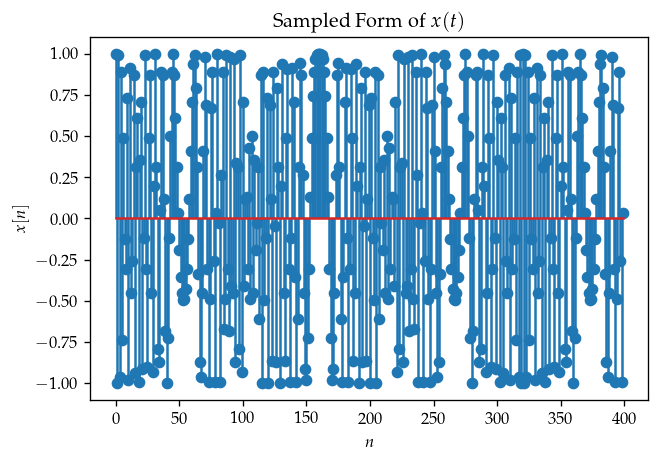

In [112]:
# parameters
mu = 0.6
f_1 = 4
fs = 8 
t = np.arange(0, 50, 1/fs)
n = np.arange(0, len(t))

# define x
x = np.cos(np.pi*mu*t**2 + 2*np.pi*f_1*t)

plt.figure(dpi=120)
plt.stem(n, x)
plt.title("Sampled Form of $x(t)$")
plt.xlabel("$n$")
plt.ylabel("$x[n]$")
plt.savefig('Q3_part3')

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="gray">
سوال 4    
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
        الف) در سلول زیر سیگنال های $x_1[n]$ و $x_2[n]$ تعریف و سپس رسم شده اند:
    </font>
</p>

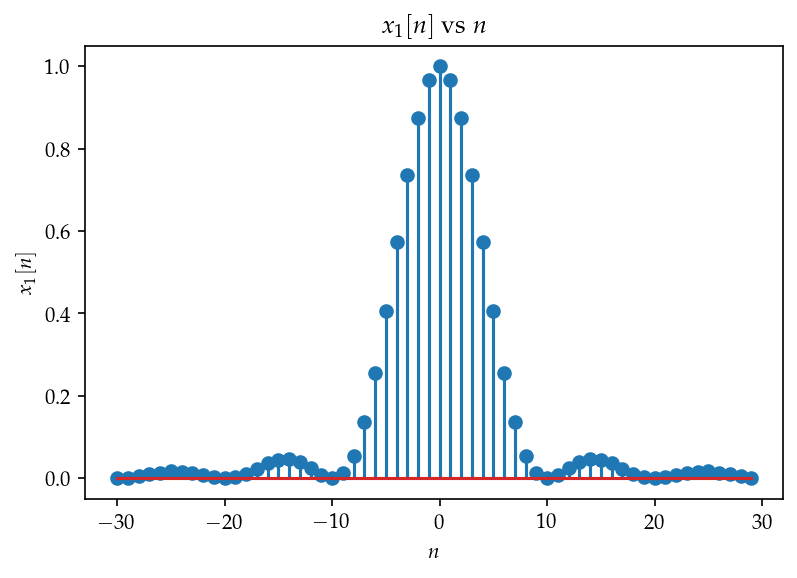

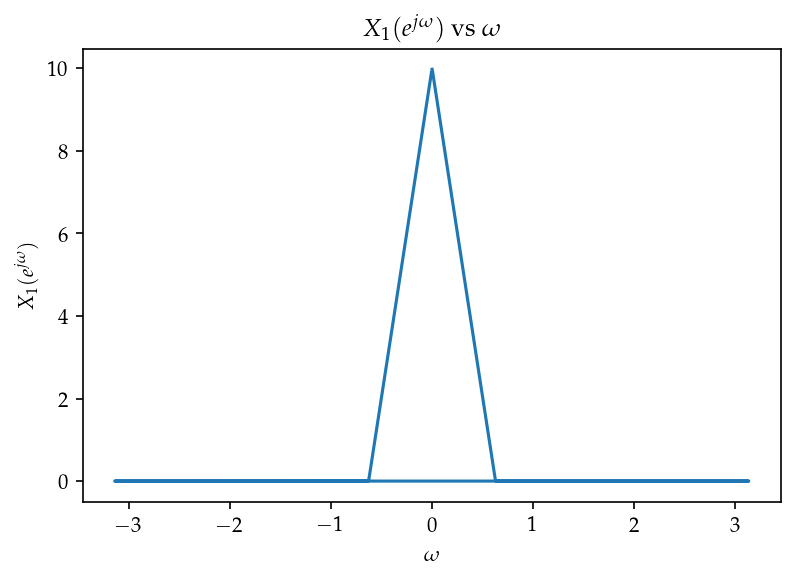

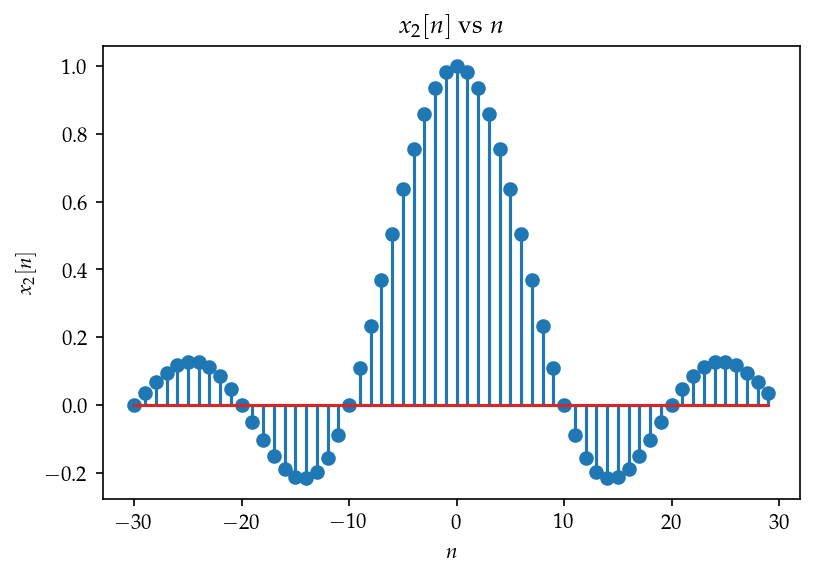

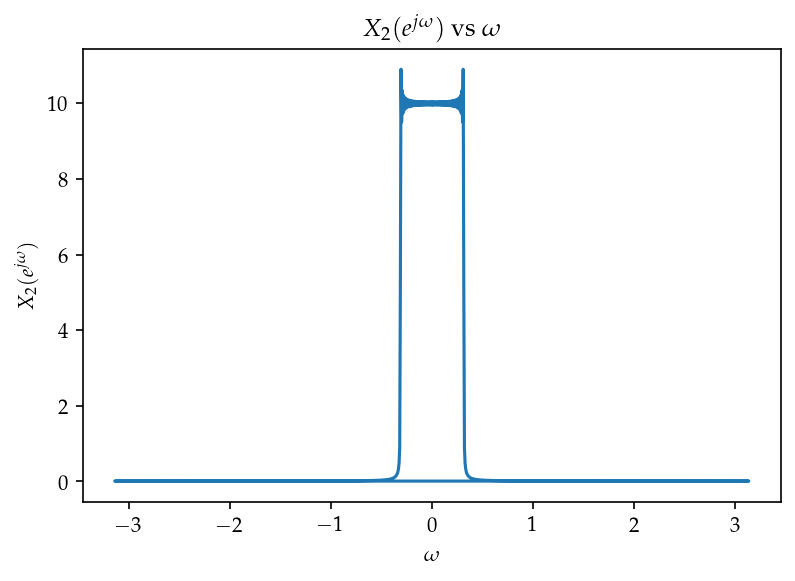

In [113]:
# define x1[n]
n = np.arange(-30, 30)
x1 = (np.sinc(n / 10)) ** 2
plt.figure(dpi=150)
plt.stem(n, x1)
plt.title('$x_1[n]$ vs $n$')
plt.xlabel('$n$')
plt.ylabel('$x_1[n]$')
plt.savefig('Q4_part1_1')

# plot fourier transform of x1[n]
n = np.arange(-500, 500)
x1 = (np.sinc(n / 10)) ** 2
X1 = fft(x1)
freq = fftfreq(n.shape[-1])
plt.figure(dpi=150)
plt.plot(freq*2*np.pi, abs(X1))
plt.title('$X_1(e^{j\\omega})$ vs $\\omega$')
plt.xlabel('$\\omega$')
plt.ylabel('$X_1(e^{j\\omega})$')
plt.savefig('Q4_part1_2')

# define x2[n]
n = np.arange(-30, 30)
x2 = np.sinc(n / 10)
plt.figure(dpi=150)
plt.stem(n, x2)
plt.title('$x_2[n]$ vs $n$')
plt.xlabel('$n$')
plt.ylabel('$x_2[n]$')
plt.savefig('Q4_part1_3')

# plot fourier transform of x2[n]
n = np.arange(-500, 500)
x2 = np.sinc(n / 10)
X2 = fft(x2)
freq = fftfreq(n.shape[-1])
plt.figure(dpi=150)
plt.plot(freq*2*np.pi, abs(X2))
plt.title('$X_2(e^{j\\omega})$ vs $\\omega$')
plt.xlabel('$\\omega$')
plt.ylabel('$X_2(e^{j\\omega})$')
plt.savefig('Q4_part1_4')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
        ب) رسم سیگنال 
        $y_1[n]$
        :
    </font>
</p>

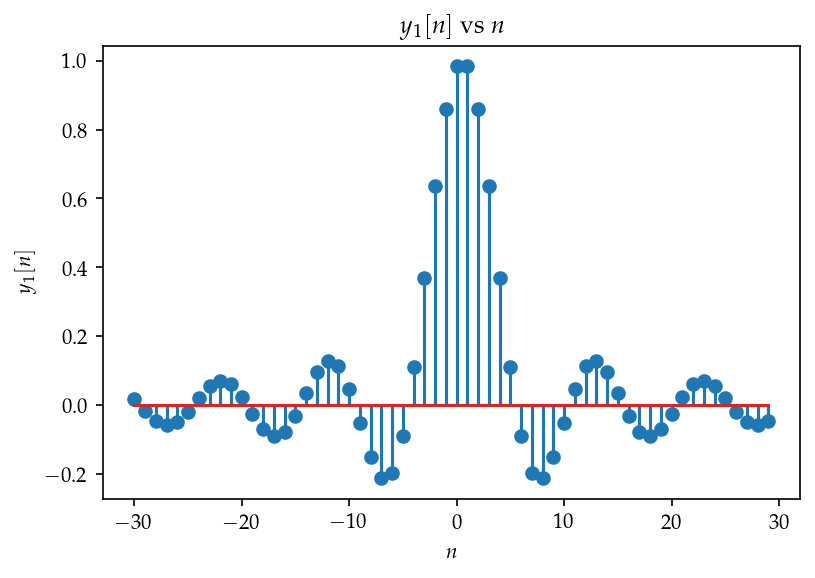

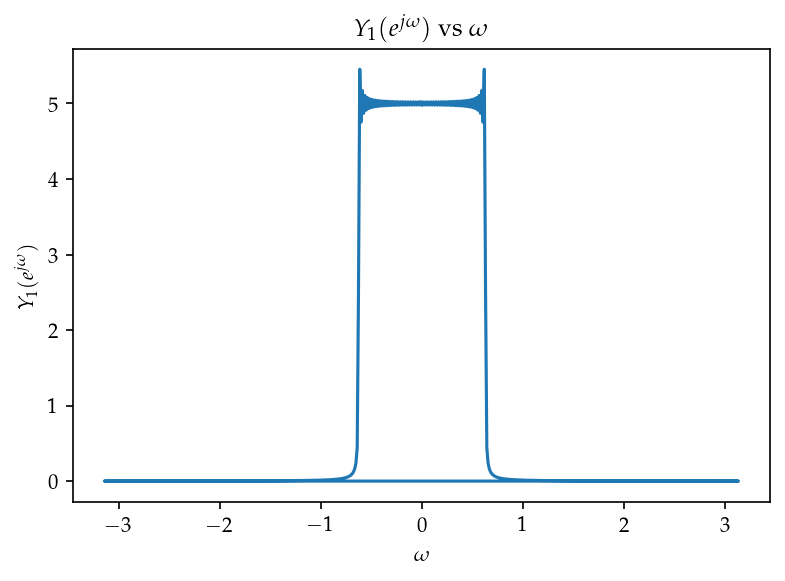

In [114]:
# define y1[n]
def y1(i, l):
    return x2[2*i + l//2-1]

# plot y1[n]
i = np.arange(-30, 30)
plt.figure(dpi=150)
plt.stem(i, y1(i, len(n)))
plt.title('$y_1[n]$ vs $n$')
plt.xlabel('$n$')
plt.ylabel('$y_1[n]$')
plt.savefig('Q4_part2_1')


# plot fourier transform of y1[n]
i = np.arange(-250, 250)
y = y1(i, len(n))
Y1 = fft(y)
freq = fftfreq(i.shape[-1])
plt.figure(dpi=150)
plt.plot(freq*2*np.pi, abs(Y1))
plt.title('$Y_1(e^{j\\omega})$ vs $\\omega$')
plt.xlabel('$\\omega$')
plt.ylabel('$Y_1(e^{j\\omega})$')
plt.savefig('Q4_part2_2')    

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         رسم سیگنال 
        $y_2[n]$
        :
    </font>
</p>

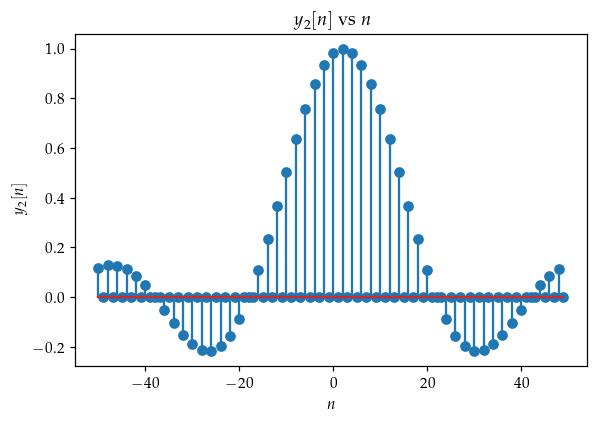

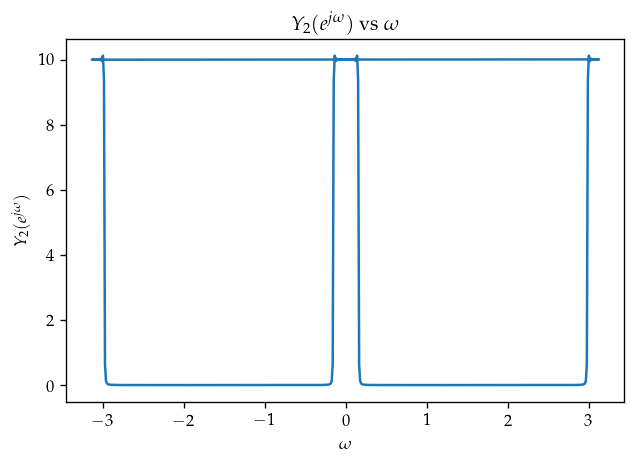

In [115]:
# define y2[n]
def y2(i, l):
    ans = np.zeros(len(i))
    for index in i:
        if index%2 == 0:
            ans[index + len(i)//2] = x2[index//2 + l//2-1]
    return ans

# plot y2[n]
i = np.arange(-50, 50)
plt.figure(dpi=110)
plt.stem(i, y2(i, len(n)))
plt.title('$y_2[n]$ vs $n$')
plt.xlabel('$n$')
plt.ylabel('$y_2[n]$')
plt.savefig('Q4_part2_3')

# plot fourier transform of y3[n]
i = np.arange(-250, 250)
y = y2(i, len(n))
Y2 = fft(y)
freq = fftfreq(i.shape[-1])
plt.figure(dpi=120)
plt.plot(freq*2*np.pi, abs(Y2))
plt.title('$Y_2(e^{j\\omega})$ vs $\\omega$')
plt.xlabel('$\\omega$')
plt.ylabel('$Y_2(e^{j\\omega})$')
plt.savefig('Q4_part2_4')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         رسم سیگنال 
        $y_3[n]$
        :
    </font>
</p>

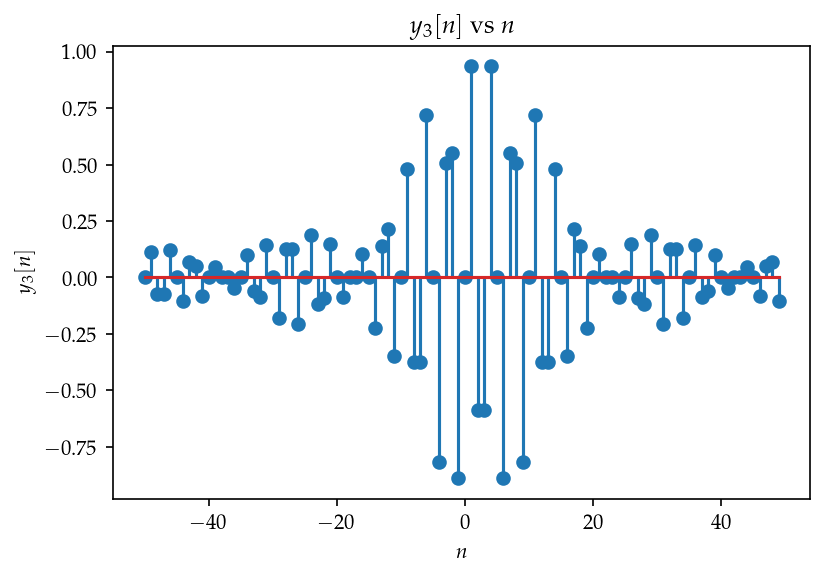

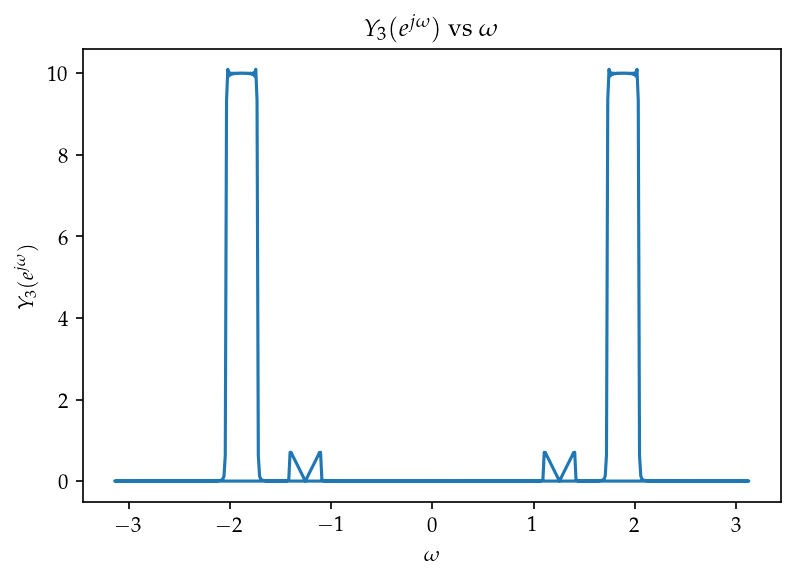

In [116]:
# define y3[n]
def y3(i, l):
    return x2[i//2 + l//2-1] * np.sin(2*np.pi*0.3*i)

# plot y3[n]
i = np.arange(-50, 50)
plt.figure(dpi=150)
plt.stem(i, y3(i, len(n)))
plt.title('$y_3[n]$ vs $n$')
plt.xlabel('$n$')
plt.ylabel('$y_3[n]$')
plt.savefig('Q4_part2_5')


# plot fourier transform of y3[n]
i = np.arange(-250, 250)
y = y3(i, len(n))
Y3 = fft(y)
freq = fftfreq(i.shape[-1])
plt.figure(dpi=150)
plt.plot(freq*2*np.pi, abs(Y3))
plt.title('$Y_3(e^{j\\omega})$ vs $\\omega$')
plt.xlabel('$\\omega$')
plt.ylabel('$Y_3(e^{j\\omega})$')
plt.savefig('Q4_part2_6')

<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="gray">
سوال 5    
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         الف) تابع در سلول زیر نوشته شده است:
    </font>
</p>

In [54]:
# write sinc_interpolation function
def sinc_interpolation(x0, t0, t):
    
    # define sinc function
    def sinc(z, z0):
        if np.min(z) <= z0 <= np.max(z):
            return np.sinc(z0)
        return 0
    
    # parameters
    T = t[1] - t[0]
    omega_c = np.pi/T
    x = np.zeros((len(t), 1))
    
    # interpolation
    for i in range(len(t)):
        for j in range(len(t0)):
            x[i] += x0[j] * omega_c*T/np.pi * sinc(t0, omega_c/np.pi*(t[i]-j*T))
    return x

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         ب) درونیابی در سلول زیر انجام شده است و سپس نمودار موردنظر رسم شده است.
    </font>
</p>

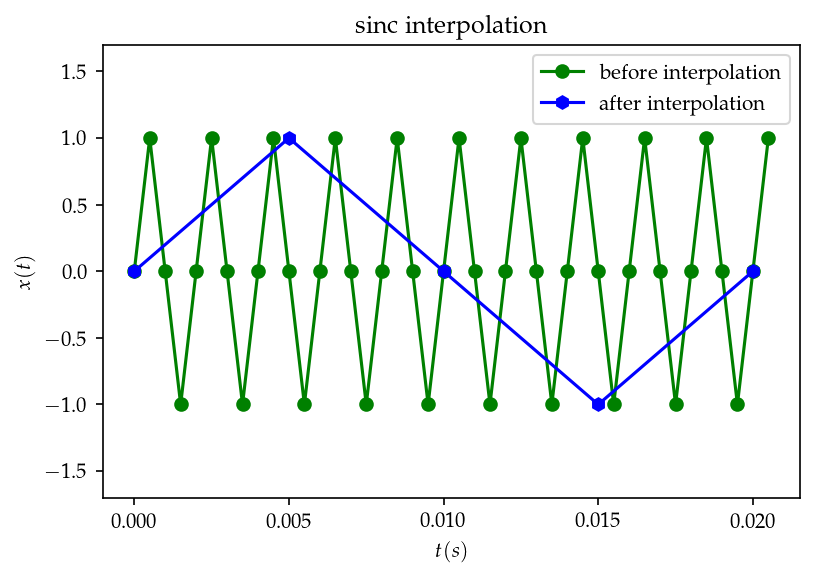

In [55]:
# parameters
t0 = np.arange(0, 0.021, 0.0005)
x0 = np.sin(1000*np.pi*t0) + np.sin(2000*np.pi*t0)
t = np.arange(0, 0.021, 0.005)
x = sinc_interpolation(x0, t0, t)

# plot x(t)
plt.figure(dpi=150)
plt.plot(t0, x0, label='before interpolation', color='green', marker='o')
plt.plot(t, x, label='after interpolation', color='blue', marker='h')
plt.legend(loc='best')
plt.title('sinc interpolation')
plt.xlabel('$t(s)$')
plt.ylabel('$x(t)$')
plt.ylim([-1.7, 1.7])
plt.savefig('Q5_part2')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         پ) تابع limited_sinc_interpolation در سلول زیر نوشته شده است.
    </font>
</p>

In [83]:
# write limited_sinc_interpolation function
def limited_sinc_interpolation(x0, t0, t):
    
    # define sinc function
    def sinc(z0):
        if -5 <= z0 <= 5:
            return np.sinc(z0)
        return 0
    
    # parameters
    T = t[1] - t[0]
    omega_c = np.pi/T
    x = np.zeros((len(t), 1))
    
    # interpolation
    for i in range(len(t)):
        for j in range(len(t0)):
            x[i] += x0[j] * omega_c*T/np.pi * sinc(omega_c/np.pi*(t[i]-j*T))
    return x

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         ت) درونیابی در سلول زیر انجام شده است و سپس نمودار موردنظر رسم شده است.
    </font>
</p>

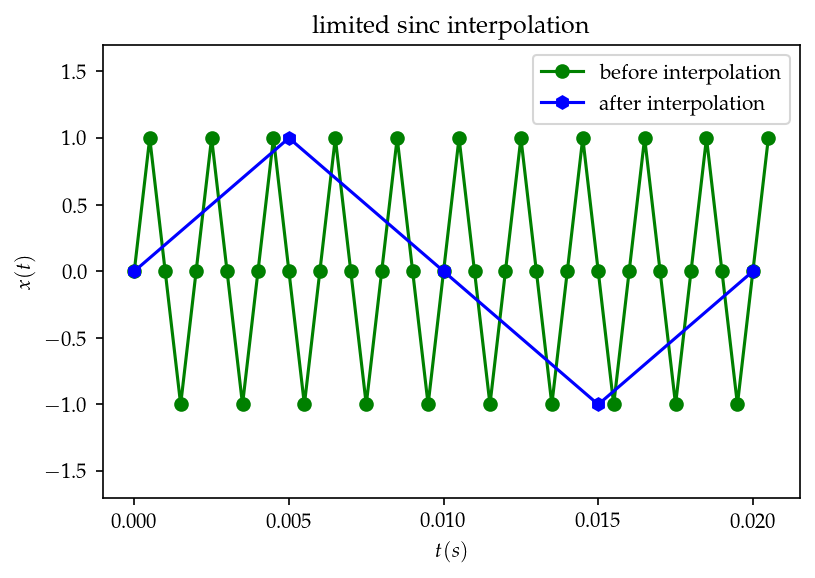

In [75]:
# parameters
t0 = np.arange(0, 0.021, 0.0005)
x0 = np.sin(1000*np.pi*t0) + np.sin(2000*np.pi*t0)
t = np.arange(0, 0.021, 0.005)
x = limited_sinc_interpolation(x0, t0, t)

# plot x(t)
plt.figure(dpi=150)
plt.plot(t0, x0, label='before interpolation', color='green', marker='o')
plt.plot(t, x, label='after interpolation', color='blue', marker='h')
plt.legend(loc='best')
plt.title('limited sinc interpolation')
plt.xlabel('$t(s)$')
plt.ylabel('$x(t)$')
plt.ylim([-1.7, 1.7])
plt.savefig('Q5_part4')

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font face="vazir" size=3>
         ث) در سلول زیر به ازای فرکانس های مختلف رسم صورت گرفته است:
    </font>
</p>

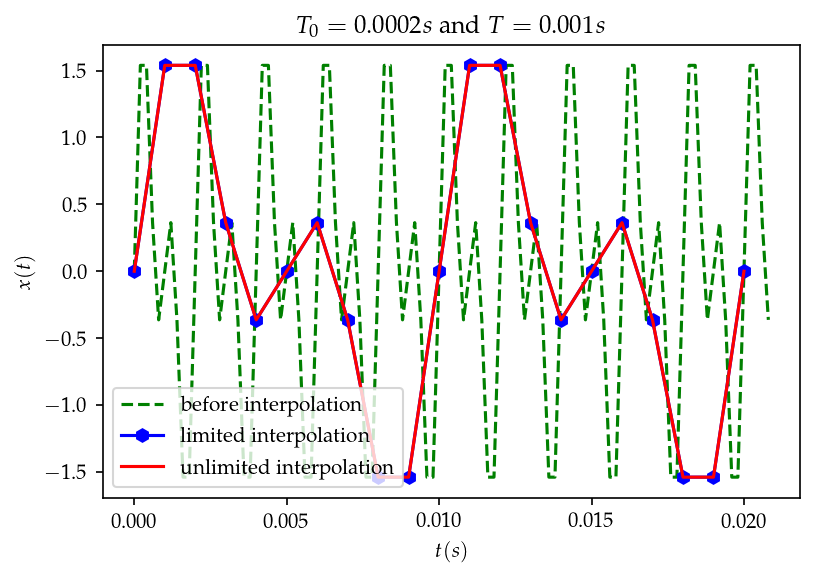

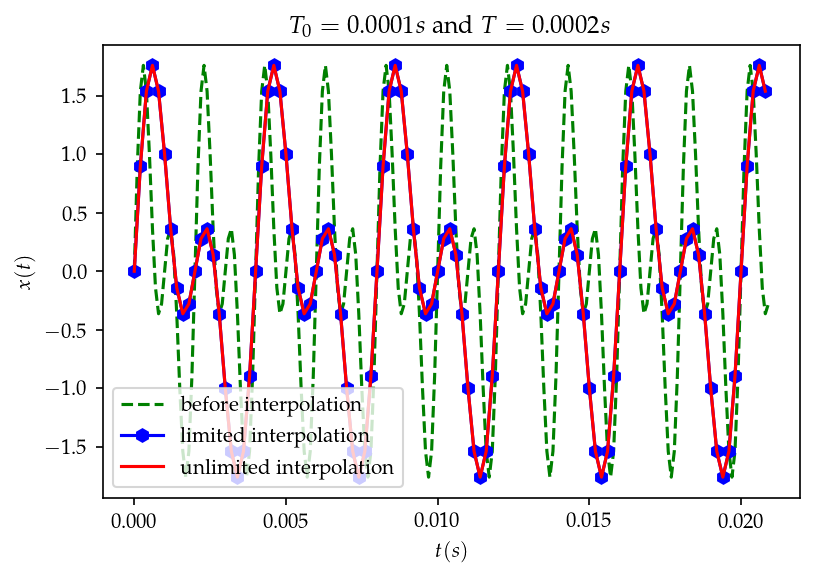

In [91]:
# parameters
t0 = np.arange(0, 0.021, 0.0002)
x0 = np.sin(1000*np.pi*t0) + np.sin(2000*np.pi*t0)
t = np.arange(0, 0.021, 0.001)
x1 = limited_sinc_interpolation(x0, t0, t)
x2 = sinc_interpolation(x0, t0, t)

# plot x(t)
plt.figure(dpi=150)
plt.plot(t0, x0, label='before interpolation', color='green', linestyle='dashed')
plt.plot(t, x1, label='limited interpolation', color='blue', marker='h')
plt.plot(t, x2, label='unlimited interpolation', color='red')
plt.legend(loc='best')
plt.title('$T_0=0.0002s$ and $T=0.001s$')
plt.xlabel('$t(s)$')
plt.ylabel('$x(t)$')
plt.savefig('Q5_part5_1')

# parameters
t0 = np.arange(0, 0.021, 0.0001)
x0 = np.sin(1000*np.pi*t0) + np.sin(2000*np.pi*t0)
t = np.arange(0, 0.021, 0.0002)
x1 = limited_sinc_interpolation(x0, t0, t)
x2 = sinc_interpolation(x0, t0, t)

# plot x(t)
plt.figure(dpi=150)
plt.plot(t0, x0, label='before interpolation', color='green', linestyle='dashed')
plt.plot(t, x1, label='limited interpolation', color='blue', marker='h')
plt.plot(t, x2, label='unlimited interpolation', color='red')
plt.legend(loc='best')
plt.title('$T_0=0.0001s$ and $T=0.0002s$')
plt.xlabel('$t(s)$')
plt.ylabel('$x(t)$')
plt.savefig('Q5_part5_2')